# 金融时间序列函数

In [111]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

In [ ]:
ts.set_token('23469bd0e75228a4a7c650005d4589b5afa491fe1f379c2aaa27d23e')
pro = ts.pro_api()

In [115]:
#多个股票
df = pro.daily(ts_code='000001.SZ', start_date='20050101', end_date='20231105')
df.iloc[:,1:].to_csv("000001.csv",index=False)

**描述性统计**

In [120]:
raw_data = pd.read_csv("000001.csv",index_col=0,parse_dates=True)
raw_data = raw_data.sort_values(by = 'trade_date',ascending=True)
data = raw_data.iloc[:,:4]
data.tail()

,open,high,low,close
trade_date,,,,
2023-10-30,10.40,10.47,10.35,10.45
2023-10-31,10.43,10.49,10.41,10.46
2023-11-01,10.55,10.56,10.45,10.48
2023-11-02,10.50,10.60,10.47,10.48
2023-11-03,10.49,10.52,10.43,10.48


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4428 entries, 2005-01-04 to 2023-11-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4428 non-null   float64
 1   high    4428 non-null   float64
 2   low     4428 non-null   float64
 3   close   4428 non-null   float64
dtypes: float64(4)
memory usage: 173.0 KB


In [90]:
data.describe().round(2)

,open,high,low,close
count,4428.00,4428.00,4428.00,4428.00
mean,14.87,15.14,14.63,14.89
std,6.52,6.70,6.35,6.52
min,5.09,5.23,5.05,5.10
25%,10.58,10.74,10.46,10.59
50%,13.66,13.90,13.42,13.66
75%,17.24,17.48,17.00,17.23
max,47.11,48.98,47.01,48.05


In [91]:
data.aggregate([min,max,np.mean,np.std,np.median]).round(2)

,open,high,low,close
min,5.09,5.23,5.05,5.10
max,47.11,48.98,47.01,48.05
mean,14.87,15.14,14.63,14.89
std,6.52,6.70,6.35,6.52
median,13.66,13.90,13.42,13.66


**序列变化分析**

In [92]:
data.diff().tail()

,open,high,low,close
trade_date,,,,
2023-10-30,0.02,-0.01,0.02,0.00
2023-10-31,0.03,0.02,0.06,0.01
2023-11-01,0.12,0.07,0.04,0.02
2023-11-02,-0.05,0.04,0.02,0.00
2023-11-03,-0.01,-0.08,-0.04,0.00


In [93]:
data.pct_change().round(2).tail()

,open,high,low,close
trade_date,,,,
2023-10-30,0.00,-0.00,0.00,0.0
2023-10-31,0.00,0.00,0.01,0.0
2023-11-01,0.01,0.01,0.00,0.0
2023-11-02,-0.00,0.00,0.00,0.0
2023-11-03,-0.00,-0.01,-0.00,0.0


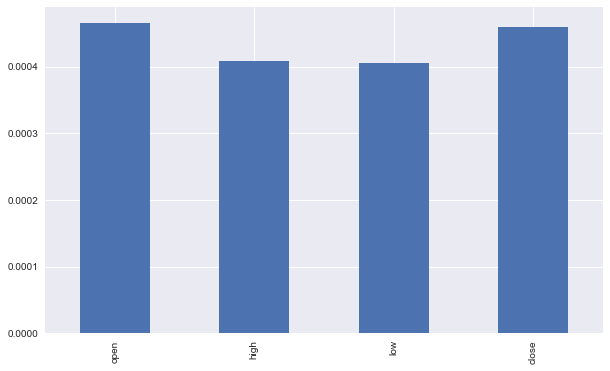

In [94]:
data.pct_change().mean().plot(kind = 'bar',figsize = (10,6))

In [95]:
rets = np.log(data/data.shift(1))
rets

,open,high,low,close
trade_date,,,,
2005-01-04,NaN,NaN,NaN,NaN
2005-01-05,-0.010679,-0.006088,-0.017175,-0.009245
2005-01-06,-0.003072,0.006088,0.015625,0.009245
2005-01-07,0.012233,0.001516,0.001549,-0.001535
2005-01-10,-0.010695,-0.001516,-0.014030,0.012214
...,...,...,...,...
2023-10-30,0.001925,-0.000955,0.001934,0.000000
2023-10-31,0.002880,0.001908,0.005780,0.000956
2023-11-01,0.011440,0.006651,0.003835,0.001910


In [96]:
cum_data = rets.cumsum().apply(np.exp)
cum_data

,open,high,low,close
trade_date,,,,
2005-01-04,NaN,NaN,NaN,NaN
2005-01-05,0.989378,0.993930,0.982972,0.990798
2005-01-06,0.986343,1.000000,0.998452,1.000000
2005-01-07,0.998483,1.001517,1.000000,0.998466
2005-01-10,0.987860,1.000000,0.986068,1.010736
...,...,...,...,...
2023-10-30,1.578149,1.588771,1.602167,1.602761
2023-10-31,1.582701,1.591806,1.611455,1.604294
2023-11-01,1.600910,1.602428,1.617647,1.607362


In [97]:
cum_data_2 = (data/data.shift(1)).cumprod()
cum_data_2

,open,high,low,close
trade_date,,,,
2005-01-04,NaN,NaN,NaN,NaN
2005-01-05,0.989378,0.993930,0.982972,0.990798
2005-01-06,0.986343,1.000000,0.998452,1.000000
2005-01-07,0.998483,1.001517,1.000000,0.998466
2005-01-10,0.987860,1.000000,0.986068,1.010736
...,...,...,...,...
2023-10-30,1.578149,1.588771,1.602167,1.602761
2023-10-31,1.582701,1.591806,1.611455,1.604294
2023-11-01,1.600910,1.602428,1.617647,1.607362


**重采样**

In [98]:
data.resample('1w').last()

,open,high,low,close
trade_date,,,,
2005-01-09,6.58,6.60,6.46,6.51
2005-01-16,6.58,6.60,6.49,6.50
2005-01-23,6.00,6.50,5.85,6.41
2005-01-30,6.13,6.18,6.05,6.17
2005-02-06,6.30,6.74,6.24,6.60
...,...,...,...,...
2023-10-08,NaN,NaN,NaN,NaN
2023-10-15,11.03,11.07,10.95,11.00
2023-10-22,10.55,10.67,10.51,10.60


In [100]:
data.resample('1w',label='right').last()

,open,high,low,close
trade_date,,,,
2005-01-09,6.58,6.60,6.46,6.51
2005-01-16,6.58,6.60,6.49,6.50
2005-01-23,6.00,6.50,5.85,6.41
2005-01-30,6.13,6.18,6.05,6.17
2005-02-06,6.30,6.74,6.24,6.60
...,...,...,...,...
2023-10-08,NaN,NaN,NaN,NaN
2023-10-15,11.03,11.07,10.95,11.00
2023-10-22,10.55,10.67,10.51,10.60


**时间窗口**

In [101]:
windows = 10

In [103]:
data.rolling(window=windows).mean()

,open,high,low,close
trade_date,,,,
2005-01-04,NaN,NaN,NaN,NaN
2005-01-05,NaN,NaN,NaN,NaN
2005-01-06,NaN,NaN,NaN,NaN
2005-01-07,NaN,NaN,NaN,NaN
2005-01-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-10-30,10.619,10.678,10.518,10.591
2023-10-31,10.561,10.622,10.463,10.535
2023-11-01,10.517,10.576,10.417,10.488


# 股票序列分析策略

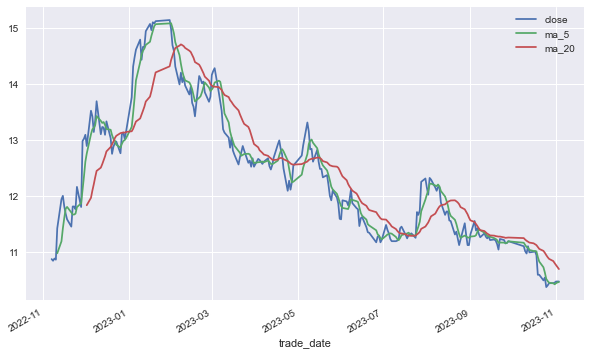

In [113]:
recent_data = data['20221105':'20231105']
recent_data['ma_5'] = recent_data['close'].rolling(5).mean()
recent_data['ma_20'] = recent_data['close'].rolling(20).mean()
recent_data[['close','ma_5','ma_20']].plot(figsize = (10,6))

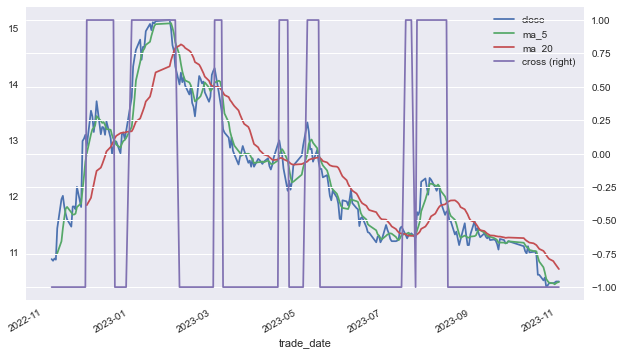

In [114]:
recent_data['cross'] = np.where(recent_data['ma_5']>recent_data['ma_20'],1,-1)
recent_data[['close','ma_5','ma_20','cross']].plot(figsize = (10,6),secondary_y = 'cross')

**回归方程**

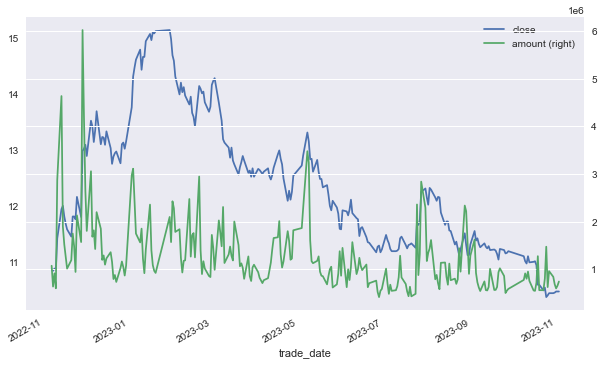

In [128]:
raw_data.loc['20221105':'20231105',['close','amount']].plot(figsize = (10,6),secondary_y = 'amount')

In [135]:
rets = np.log(raw_data[['close','amount']]/raw_data[['close','amount']].shift(1))
rets = rets.dropna()

In [165]:
regs = np.polyfit(rets['close'],rets['amount'],deg=1)
regs

array([3.90553046e+00, 5.22304296e-04])

In [166]:
pd.Series(np.polyval(regs,rets['close'])).value_counts()

 0.000522    114
-0.011896      5
-0.026320      4
-0.016645      4
 0.022280      3
            ... 
-0.111807      1
-0.020904      1
 0.071491      1
-0.020633      1
 0.007983      1
Length: 4147, dtype: int64

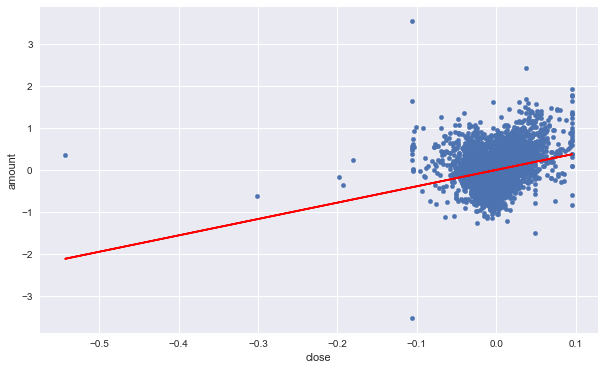

In [167]:
ax = rets.plot(kind = 'scatter',x = 'close',y = 'amount',figsize = (10,6))
ax.plot(rets['close'],np.polyval(regs,rets['close']),'r')

In [170]:
#相关系数
rets.corr()

,close,amount
close,1.00000,0.23908
amount,0.23908,1.00000


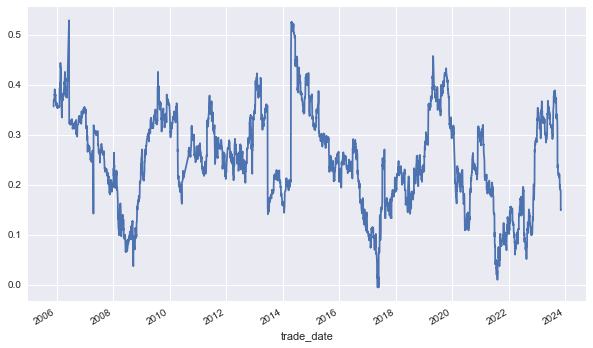

In [175]:
rets['close'].rolling(window = 200).corr(rets['amount']).plot(figsize = (10,6))